In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
plt.style.use('seaborn')

In [5]:
## data preperation

In [7]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

# normal distribution
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


In [8]:
## data visualize

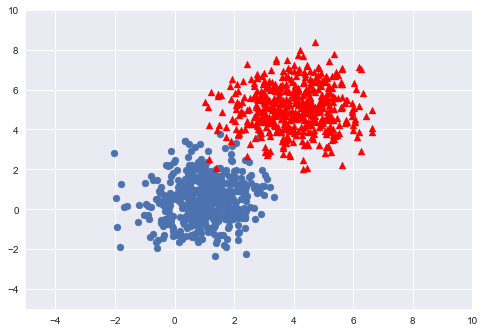

In [9]:
plt.figure(0)

plt.scatter(dist_01[:,0], dist_01[:,1])
plt.scatter(dist_02[:,0], dist_02[:,1], color='r', marker="^")

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.show()

In [10]:
## logistic regression

In [21]:
# creating train and test set

data = np.zeros((1000,3))
print(data.shape)

data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

np.random.shuffle(data)
print(data[:10])

split = int(0.8*data.shape[0])


X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(1000, 3)
[[ 1.03046098  0.88284995  0.        ]
 [-0.17580992 -0.17836506  0.        ]
 [ 4.92926986  5.0976592   1.        ]
 [ 4.377607    4.88934374  1.        ]
 [ 4.02255921  6.94319546  1.        ]
 [ 1.9001358   2.47252343  0.        ]
 [ 1.10581561 -0.9317352   0.        ]
 [ 4.46383118  4.93951604  1.        ]
 [ 0.59421541  2.20848798  0.        ]
 [ 6.00142153  3.97167169  1.        ]]
(800, 2) (200, 2)
(800,) (200,)


In [31]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [32]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [36]:
for i in range(1000):
    l, w, b = grad_descent(X_train, Y_train, W, b)
    loss.append(l)
    acc.append(get_acc(X_test, Y_test, W, b))

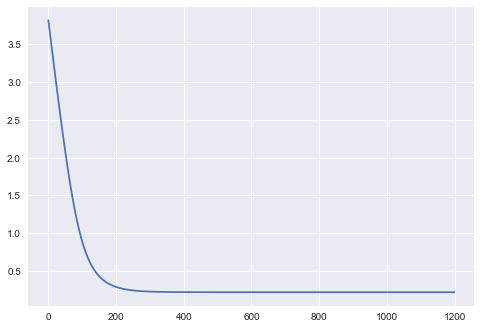

In [37]:
plt.plot(loss)
plt.show()

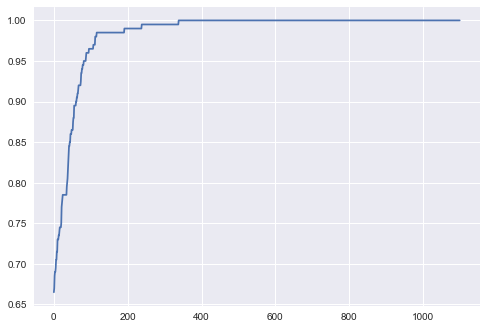

1.0


In [38]:
plt.plot(acc)
plt.show()
print(acc[-1])

In [39]:
## visualising decision boundary

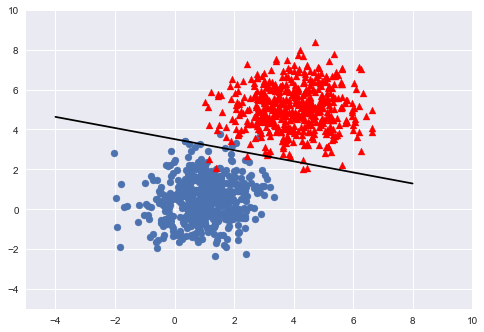

In [43]:
plt.figure(0)

plt.scatter(dist_01[:,0], dist_01[:,1])
plt.scatter(dist_02[:,0], dist_02[:,1], color='r', marker="^")

plt.xlim(-5,10)
plt.ylim(-5,10)

x = np.linspace(-4,8, 10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y, color='black')

plt.show()

In [41]:
print(W, b)

[0.22425251 0.80514892] -2.829755339049329
